<a href="https://colab.research.google.com/github/BRCInc-dev/Data-Analysis-Tools/blob/main/M_Learning_Praktika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


Your goal is to understand which factors influence loan default the most.  



Perform full EDA.


Split your dataset using 80/20 rule.  

Train and evaluate as many machine learning models as you know (e.g. XGBoost, SVC, Logistic Regression etc.)

Compare performance of your models using AUC-ROC, Precision, Recall and Confusion Matrix.

---



# 1. Import Libraries and Load Data

In [ ]:
!pip install openpyxl xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Load the dataset
df = pd.read_excel("/content/Loan_default.xlsx")

# 2. Exploratory Data Analysis (EDA)

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

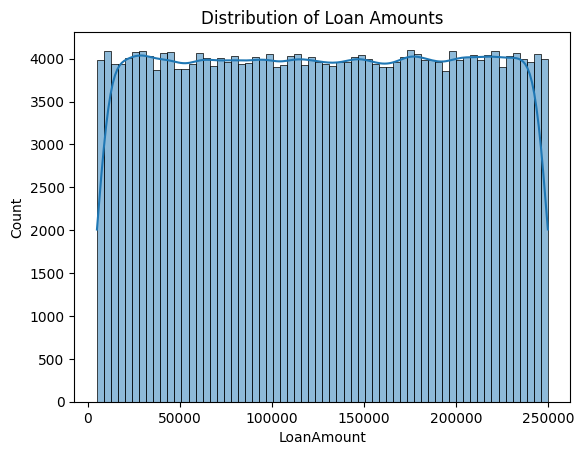

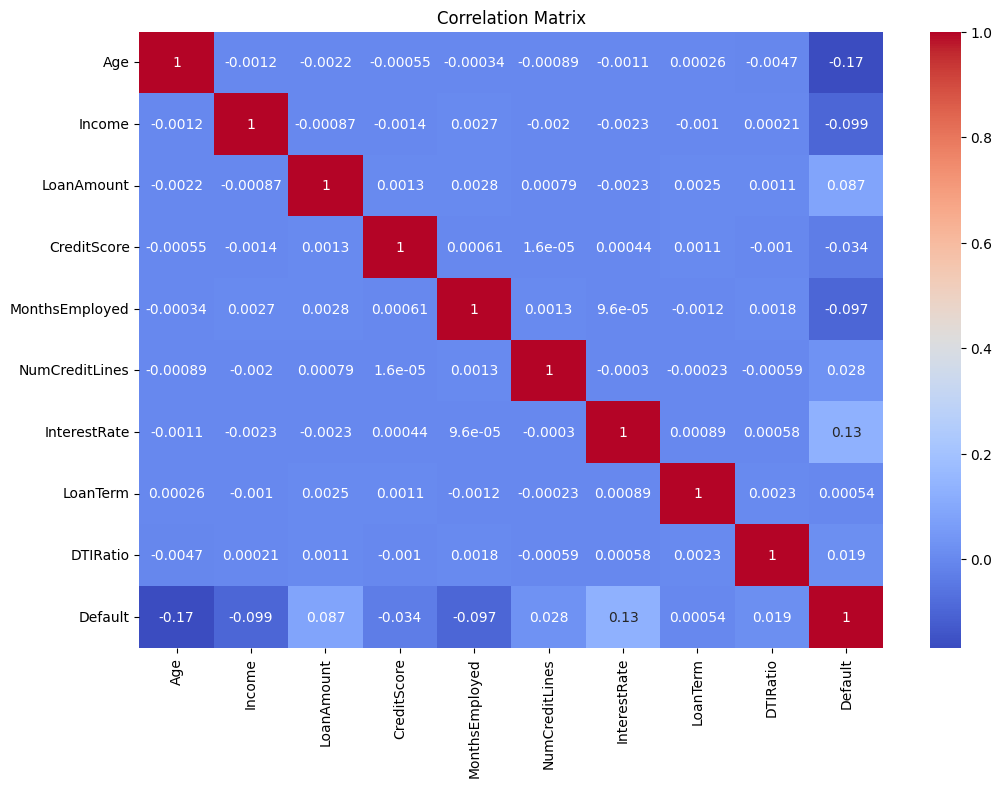

In [ ]:
# Display basic information
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualizations
# Example: Distribution of loan amounts
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

# Example: Correlation matrix
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# 3. Data Preprocessing

In [ ]:
!pip install openpyxl xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Load the dataset
df = pd.read_excel("/content/Loan_default.xlsx")

# Convert categorical features to numerical using one-hot encoding

In [ ]:
# Print the column names of your DataFrame
print(df.columns)

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


# 4. Model Training and Evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Load the dataset
df = pd.read_excel("/content/Loan_default.xlsx")
# Handle missing values (if any) - imputation or removal

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split data into training and testing sets (80/20)
# This section is crucial for defining X_train, X_test, y_train, y_test
X = df.drop(columns=['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'])
y = df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now define your models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(probability=True),
    'XGBoost': XGBClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

# 5. Feature Importance (for XGBoost)

In [ ]:
# Get feature importance from XGBoost
importance = models['XGBoost'].feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importance')
plt.show()

NameError: name 'models' is not defined